## Apply QUBO

## MATRIX INVERSION AS A QUBO PROBLEM

Ref  
[1.Floating-Point Calculations on a Quantum Annealer:
Division and Matrix Inversion](https://arxiv.org/pdf/1901.06526.pdf)

In this section we present an algorithm for solving a system of linear equations on a
quantum annealer. To precisely define the mathematical problem, let $M$ be a nonsingular $N × N$ real matrix, and let $Y$ be a real $N$ dimensional vector; we then wish to solve the linear equation
$$ M · x = Y$$
The linearity of the system means that there is a unique solution,
$$x = M^{−1} · Y$$

Constructing a quadratic matrix 
$$H(x) = (M x − Y)^2 = (M x − Y)^T · (M x − Y)$$
$$H(x) = x^T M^T Mx - x^T M^T Y - Y^T M x +Y^T Y$$
$$H(x) = \sum_{ijk=1}^{N} M_{ki} M_{kj} x^i x^j - 2\sum_{ij=1}^N Y_j M_{ji} x^i + ||Y^2||$$
To obtain a floating point representation of each component
of $x = (x_1, · · · , x_N)^T$ by expanding in powers of 2 multiplied by Boolean-valued variables
$$\chi^i = \sum_{r=0}^{R-1} 2^{-r}q_r^i $$
$$x^i = 2\chi^i-1$$

And to obtain integer representation, the real value $x_i$

$$ x_i = \sum_{l=-m}^m 2^{-l} q_{i,l}$$


As before, the domains are given by $\chi^i\in [0, 2)$ and $x^i \in [−1, 3)$, and upon expressing $x$ as a function the $q_r^i$ we can recast $H(x)$ in the form  
$$H(q) = \sum_{i=1}^{N}\sum_{r=0}^{R-1} a_r^i q_r^j + \sum_{i=1}^N \sum_{i\neq j=1}^N \sum_{r=0}^{R-1} \sum_{s=0}^{R-1} b_{rs}^{ij} q_{r}^i q_s^i$$

where $N$ is dimention of coefficient matrix and $R$ is resolution of qbit
$$a_r^i = \sum_{k=0}^{N-1}\sum_{i=0}^{N-1}\sum_{r=0}^{R-1}2^{1-r}(a_{ki}^2-a_{ki}b_k) - \sum_{k=0}^{N-1}\sum_{i=0}^{N-1}\sum_{r=0}^{R-1}\sum_{j>i}^{N-1}2^{2-r}a_{ki}a_{kj}$$

$$b_{rs}^{ij} = \sum_{k=0}^{N-1}\sum_{i=0}^{N-1}\sum_{j>i}^{N-1}\sum_{r=0}^{R-1}\sum_{s=0}^{R-1}2^{2-r-s}a_{ki}a_{kj}$$

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import random, math
import copy

Dimension = 1
qubits = 4
N = Dimension
R = qubits
M = np.array([[0.5, 1.5], [1.5, 0.5]])
Y = np.array([0,1])



## Decomposition of single float variable

In [56]:
# a = 1
# b = -0.25

# r_qbit = 4
# a_l = {}
# b_lm = {}

# low_val_limit = 0.125
# lowest_val = 0;

# qbit_list = []
# for val in range(r_qbit):
#     qbit_list.append('q'+str(val+1)) 
# print(qbit_list)

# for r in range(r_qbit):
#     val = 4*pow(a,2)*pow(2,-2*r)-4*pow(a,2)*pow(2,-r)-4*a*b*pow(2,-r)
#     if val != 0:
#         a_l[(qbit_list[r],qbit_list[r])] = val 

# for r in range(r_qbit-1):
#     for s in range(r+1,r_qbit):
#         val = 4*pow(a,2)*pow(2,-r-s)
#         if val !=0:
#             b_lm[(qbit_list[r],qbit_list[s])] = val
#         if val < lowest_val or val< low_val_limit:
#             lowest_val = val

# print(a_l)
# print(b_lm)





[[-1.2     2.      1.      0.5   ]
 [ 0.     -1.6     0.5     0.25  ]
 [ 0.      0.     -1.05    0.125 ]
 [ 0.      0.      0.     -0.5875]]


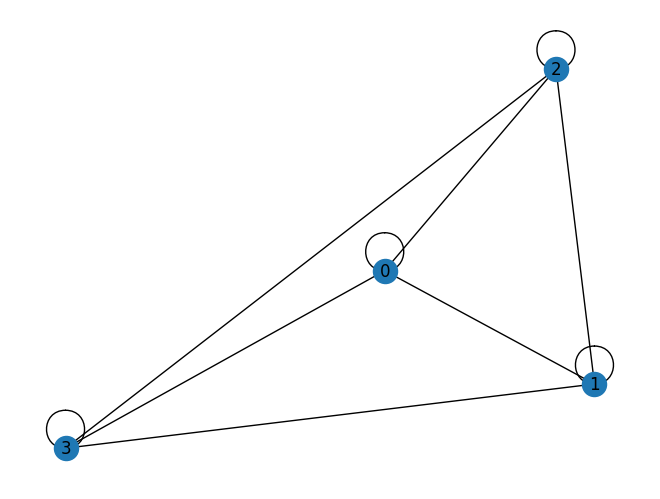

In [120]:
import dimod
import networkx as nx
import dwave_networkx as dnx
import matplotlib.pyplot as plt  
import numpy as np


a = 1
b = 0.3
# No of Qbit to decompose into
r_qbit = 4

Q = np.zeros((r_qbit,r_qbit),dtype=float)

for r in range(r_qbit):
    val = 4*pow(a,2)*pow(2,-2*r)-4*pow(a,2)*pow(2,-r)-4*a*b*pow(2,-r)
    if val != 0:
        Q[r][r] = val 

for r in range(r_qbit-1):
    for s in range(r+1,r_qbit):
        val = 4*pow(a,2)*pow(2,-r-s)
        if val !=0:
            Q[r][s] = val
print(Q)

G_nx = nx.from_numpy_matrix(Q)
nx.draw(G_nx, with_labels=True)
# Q = dict(a_l)
# Q.update(b_lm)

# nG= nx.Graph(Q)

# G = dnx.chimera_graph(4, 4, 4)
# dnx.draw_chimera(G)  # doctest: +SKIP
# # dnx.draw_chimera(a_l)
# plt.show()  # doctest: +SKIP
# plot_bqm(bqm)

DW_2000Q_6
Number of qubits= 2041
Number of couplers= 5974


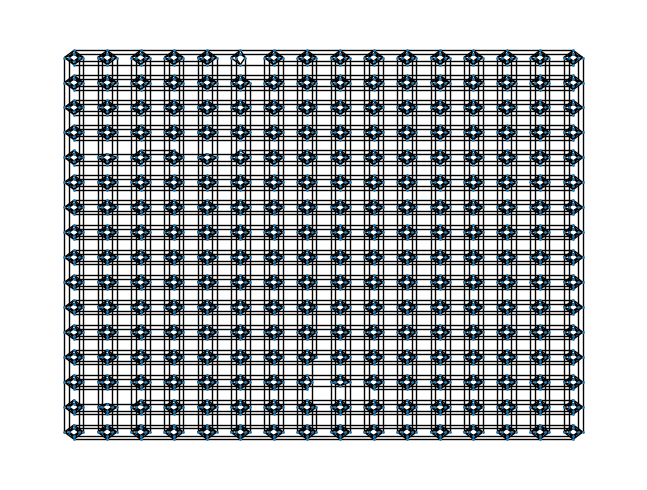

In [121]:
import dwave_networkx as dnx
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

qpu = DWaveSampler(solver='DW_2000Q_6')
qpu_edges = qpu.edgelist
qpu_nodes = qpu.nodelist

print(qpu.solver.id)

X = dnx.chimera_graph(16, node_list=qpu_nodes, edge_list=qpu_edges)
dnx.draw_chimera(X, node_size=1)
print('Number of qubits=', len(qpu_nodes))
print('Number of couplers=', len(qpu_edges))

{'timing': {'qpu_sampling_time': 389980.0, 'qpu_anneal_time_per_sample': 20.0, 'qpu_readout_time_per_sample': 349.44, 'qpu_access_time': 400853.91, 'qpu_access_overhead_time': 1381.09, 'qpu_programming_time': 10873.91, 'qpu_delay_time_per_sample': 20.54, 'post_processing_overhead_time': 414.0, 'total_post_processing_time': 414.0}, 'problem_id': 'b6e83915-7e24-46e1-b131-1f25fdb097fe', 'embedding_context': {'embedding': {1: (66, 70), 0: (64, 68), 2: (65,), 3: (71,)}, 'chain_break_method': 'majority_vote', 'embedding_parameters': {}, 'chain_strength': 16.700486519859233}}


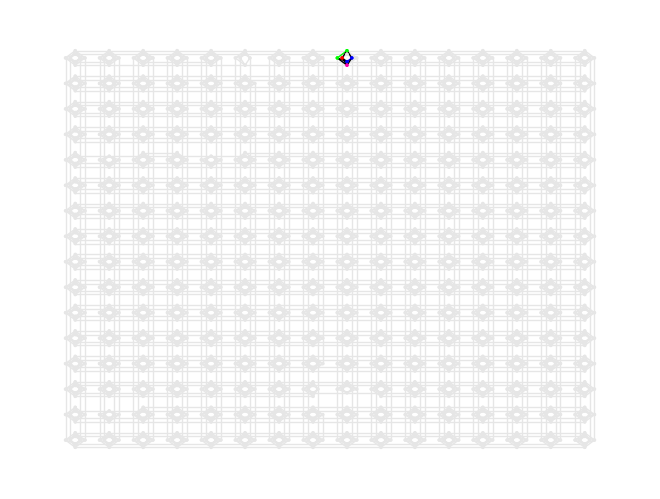

In [122]:
model = dimod.BinaryQuadraticModel.from_qubo(Q)

DWavesampler = EmbeddingComposite(DWaveSampler(solver='DW_2000Q_6'))

chain_strength = partial(uniform_torque_compensation, prefactor=40)

DWaveSamples = DWavesampler.sample(bqm=model, num_reads=1000, 
                                   return_embedding=True, 
                                   chain_strength=chain_strength, 
                                  #  annealing_time=annealing_time
                                   )

print(DWaveSamples.info)
embedding = DWaveSamples.info['embedding_context']['embedding']
dnx.draw_chimera_embedding(X, embedding, node_size=2)

In [123]:
print(DWaveSamples)

    0  1  2  3  energy num_oc. chain_.
0   0  1  1  1 -2.3625      58     0.0
1   0  1  1  0   -2.15      79     0.0
2   0  1  0  1 -1.9375      56     0.0
3   0  1  0  0    -1.6      57     0.0
4   0  0  1  1 -1.5125      43     0.0
5   1  0  0  1 -1.2875     107     0.0
6   1  0  1  0   -1.25     111     0.0
7   1  0  1  1 -1.2125      82     0.0
8   1  0  0  0    -1.2     106     0.0
9   0  0  1  0   -1.05      57     0.0
10  1  1  0  0    -0.8      67     0.0
11  1  1  0  1 -0.6375      42     0.0
12  0  0  0  1 -0.5875      33     0.0
13  1  1  1  0   -0.35      41     0.0
14  1  1  1  1 -0.0625      33     0.0
15  0  0  0  0     0.0      28     0.0
['BINARY', 16 rows, 1000 samples, 4 variables]


### Convert Qbit to Decimal 

In [119]:
samples = DWaveSamples.samples()
print(samples[0])

res = []

for i in range(1):
    res.append(0)
    for j in range(r_qbit):
        res[i] += (pow(2,-j)*samples[i,j])
    res[i] = 2*res[i]-1
print("Output: ", res)
print("input A: ", a," b: ", b)

{0: 0, 1: 0, 2: 1, 3: 1}
Output:  [-0.25]
input A:  0.5  b:  -0.25


In [72]:
# import dimod

# #print(Q)
# J = dimod.qubo_to_ising(Q2)
# print(J)

In [71]:
# sampleset = sampler_auto.sample_ising(J[0], J[1], num_reads=1000)
# print(sampleset)